In [1]:
import xml.etree.ElementTree as ET, urllib.request, gzip, io
url = "https://github.com/OpenExoplanetCatalogue/oec_gzip/raw/master/systems.xml.gz"
oec = ET.parse(gzip.GzipFile(fileobj=io.BytesIO(urllib.request.urlopen(url).read())))

In [2]:
import pandas as pd

def parse(base):
    db = oec.findall(f".//{base}")
    
    exclude = ['star', 'videolink', 'binary'] if base in ['system', 'binary'] else ['planet']
    
    columns = set([attribute.tag for attribute in db[0] if attribute.tag not in exclude])
    results = pd.DataFrame(columns=columns)

    for entry in db:
        data = {col : entry.findtext(col) for col in columns}
        if base in ['system', 'binary']:
            data['binaries'] = len(entry.findall('.//binary'))
            data['stars'] = len(entry.findall('.//star'))
        if base in ['system', 'star', 'binary']:
            data['planets'] = len(entry.findall('.//planet'))
        results = results.append(data, ignore_index=True)

    return results

In [3]:
planets = parse('planet')
planets.head()

eccentricity periastron semimajoraxis periastrontime lastupdate  \
0        0.231       94.8          1.29      2452899.6   15/09/20   
1         0.08     117.63          1.54     2452861.04   15/09/20   
2            0          0          0.83      2452861.4   15/09/20   
3        0.359     22.230         2.864           None   15/09/21   
4        0.184    189.076         9.037           None   15/09/21   

                list discoverymethod  period discoveryyear   mass  \
0  Confirmed planets              RV  326.03          2008   19.4   
1  Confirmed planets              RV  516.22          2009  11.20   
2  Confirmed planets              RV  185.84          2008    4.8   
3  Confirmed planets              RV    1766          2002  4.975   
4      Controversial              RV    9886          2006  7.679   

                                         description      name  
0  11 Com b is a brown dwarf-mass companion to th...  11 Com b  
1  11 Ursae Minoris is a star located in the cons...  11 UMi b  
2  14 Andromedae is an evolved star in the conste...  14 And b  
3  The star 14 Herculis is only 59 light years aw...  14 Her b  
4  14 Her c is the second companion in the system...  14 Her c

In [4]:
systems = parse('system')
systems.head()

rightascension distance   constellation     declination      name  \
0   12 20 43.0255     88.9  Coma Berenices  +17 47 34.3392    11 Com   
1  15 17 05.88899    122.1      Ursa Minor  +71 49 26.0466    11 UMi   
2  23 31 17.41346     79.2       Andromeda  +39 14 10.3092    14 And   
3   16 10 24.3152     18.1        Hercules  +43 49 03.4987    14 Her   
4  19 41 48.95343   21.146          Cygnus  +50 31 30.2153  16 Cygni   

   binaries  planets  stars  
0       0.0      1.0    1.0  
1       0.0      1.0    1.0  
2       0.0      1.0    1.0  
3       0.0      2.0    1.0  
4       2.0      1.0    3.0

In [ ]:
binaries = parse('binary')
binaries.head()

positionangle separation          name  binaries  planets  stars
0        133.30      39.56      16 Cygni       1.0      1.0    3.0
1           209        3.4   16 Cygni AC       0.0      0.0    2.0
2         237.3      12.37   2M0441+2301       1.0      1.0    3.0
3         79.61     0.2323     2M 044145       0.0      0.0    2.0
4          None       None  2M 1938+4603       0.0      1.0    2.0

In [7]:
binaries = parse('binary')
binaries.head()

positionangle separation          name  binaries  planets  stars
0        133.30      39.56      16 Cygni       1.0      1.0    3.0
1           209        3.4   16 Cygni AC       0.0      0.0    2.0
2         237.3      12.37   2M0441+2301       1.0      1.0    3.0
3         79.61     0.2323     2M 044145       0.0      0.0    2.0
4          None       None  2M 1938+4603       0.0      1.0    2.0

In [8]:
stars = parse('star')
stars.head()

magJ   magV radius temperature   magK  mass   magH   magB spectraltype  \
0  2.943   4.74     19        4742  2.282   2.7  2.484   5.74       G8 III   
1  2.876  5.024  24.08        4340  1.939  1.80  2.091  6.415        K4III   
2  3.019   5.22     11        4813  2.331   2.2  2.608   6.24        K0III   
3  5.158   6.67  0.708      5311.0  4.714   1.0  4.803   7.57         K0 V   
4   5.09   5.95  1.243        5825   4.43  1.11   4.72   6.59          G2V   

  metallicity        name  planets  
0       -0.35      11 Com      1.0  
1        0.04      11 UMi      1.0  
2       -0.24      14 And      1.0  
3        0.43      14 Her      2.0  
4       0.096  16 Cygni A      0.0

In [9]:
planets.to_csv('data/planets.csv', index=False)
binaries.to_csv('data/binaries.csv', index=False)
stars.to_csv('data/stars.csv', index=False)
systems.to_csv('data/systems.csv', index=False)

This first section deals with grabbing and parsing data about the planetary orbits. The initial stages of data cleaning are performed and files saved to csv.

In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
planets = pd.read_csv('data/planets.csv')
planets.head()

mass                                        description  periastrontime  \
0  19.400  11 Com b is a brown dwarf-mass companion to th...      2452899.60   
1  11.200  11 Ursae Minoris is a star located in the cons...      2452861.04   
2   4.800  14 Andromedae is an evolved star in the conste...      2452861.40   
3   4.975  The star 14 Herculis is only 59 light years aw...             NaN   
4   7.679  14 Her c is the second companion in the system...             NaN   

   semimajoraxis  discoveryyear               list  eccentricity   period  \
0          1.290         2008.0  Confirmed planets         0.231   326.03   
1          1.540         2009.0  Confirmed planets         0.080   516.22   
2          0.830         2008.0  Confirmed planets         0.000   185.84   
3          2.864         2002.0  Confirmed planets         0.359  1766.00   
4          9.037         2006.0      Controversial         0.184  9886.00   

  discoverymethod lastupdate  periastron      name  
0              RV   15/09/20      94.800  11 Com b  
1              RV   15/09/20     117.630  11 UMi b  
2              RV   15/09/20       0.000  14 And b  
3              RV   15/09/21      22.230  14 Her b  
4              RV   15/09/21     189.076  14 Her c

<AxesSubplot:>

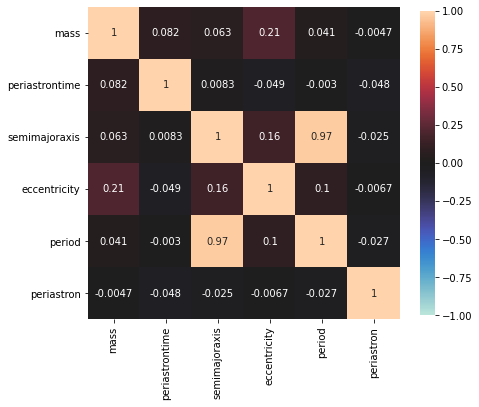

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    planets.drop(columns='discoveryyear').corr(), 
    center=0, vmin=-1, vmax=1, square=True, annot=True,
    cbar_kws={'shrink': 0.8}
)

In [ ]:
planets.eccentricity.min(), planets.eccentricity.max()

(0.0, 0.956)

Text(0.5, 1.0, 'Orbit Eccentricities')

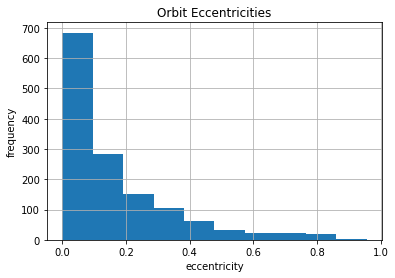

In [ ]:
planets.eccentricity.hist()
plt.xlabel('eccentricity')
plt.ylabel('frequency')
plt.title('Orbit Eccentricities')

<AxesSubplot:>

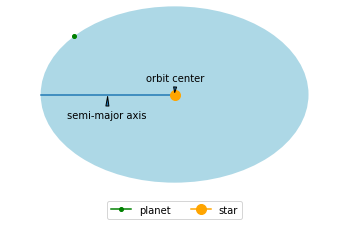

In [ ]:
from visual_aids import misc_viz
misc_viz.elliptical_orbit()

In [ ]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094 entries, 0 to 4093
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   period         3930 non-null   float64
 1   eccentricity   1388 non-null   float64
 2   semimajoraxis  1704 non-null   float64
 3   mass           1659 non-null   float64
dtypes: float64(4)
memory usage: 128.1 KB


In [ ]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].dropna().shape

(1222, 4)

In [11]:
planets[['period', 'eccentricity', 'semimajoraxis', 'mass']].describe()

period eccentricity semimajoraxis  mass
count    5113         2279          2815  2844
unique   5099          650          2265  2026
top                    0.0          1.19      
freq        7          344             8    67

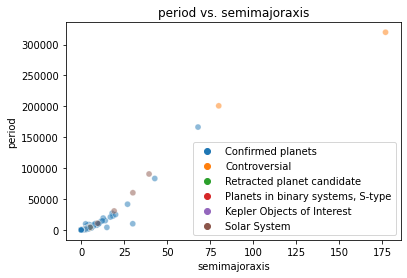

In [ ]:
sns.scatterplot(
    x=planets.semimajoraxis, y=planets.period,
    hue=planets.list, alpha=0.5
)
plt.title('period vs. semimajoraxis')
plt.legend(title='')

Text(0.5, 1.0, 'log(orbital period) vs. semi-major axis')

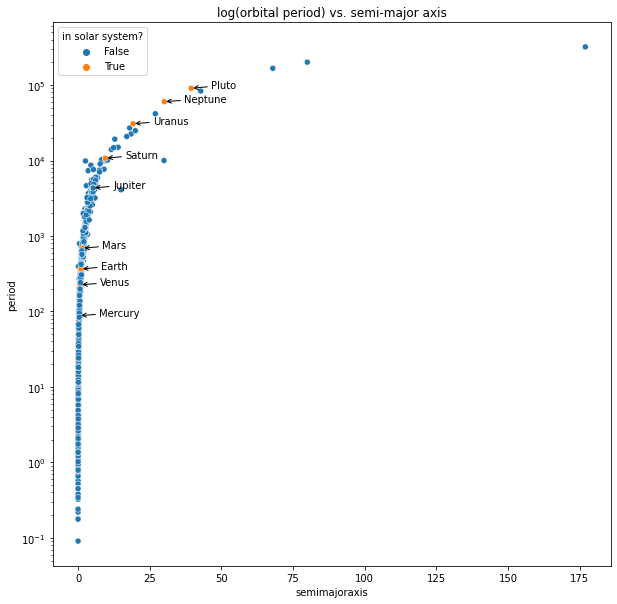

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
in_solar_system = (planets.list == 'Solar System').rename('in solar system?')
sns.scatterplot(
    x=planets.semimajoraxis, 
    y=planets.period, 
    hue=in_solar_system,
    ax=ax
)
ax.set_yscale('log')
solar_system = planets[planets.list == 'Solar System']
for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet, 
        (data.semimajoraxis, data.period), 
        (7 + data.semimajoraxis, data.period),
        arrowprops=dict(arrowstyle='->')
    )
ax.set_title('log(orbital period) vs. semi-major axis')

In [12]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

kmeans_pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('kmeans', KMeans(8, random_state=0))
])

In [ ]:
kmeans_data = planets[['semimajoraxis', 'period']].dropna()
kmeans_pipeline.fit(kmeans_data)

Pipeline(steps=[('scale', StandardScaler()),
                ('kmeans', KMeans(random_state=0))])

Text(0.5, 1.0, 'KMeans Clusters')

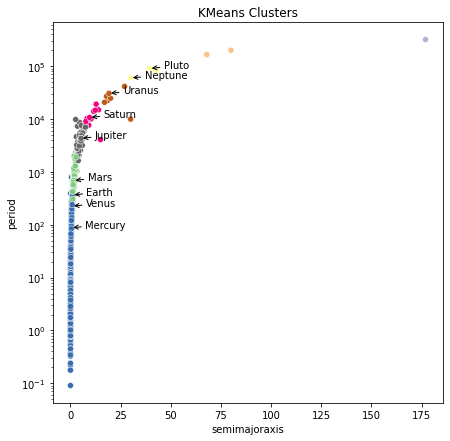

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(
    x=kmeans_data.semimajoraxis, 
    y=kmeans_data.period, 
    hue=kmeans_pipeline.predict(kmeans_data),
    ax=ax, palette='Accent'
)
ax.set_yscale('log')
solar_system = planets[planets.list == 'Solar System']
for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet, 
        (data.semimajoraxis, data.period), 
        (7 + data.semimajoraxis, data.period),
        arrowprops=dict(arrowstyle='->')
    )
ax.get_legend().remove()
ax.set_title('KMeans Clusters')

Text(4.4, 1450, '')

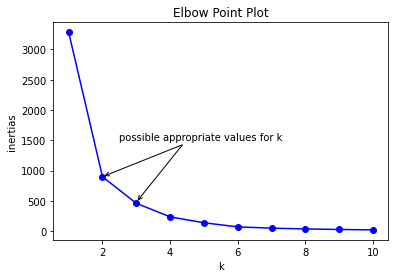

In [ ]:
from ml_utils.elbow_point import elbow_point

ax = elbow_point(
    kmeans_data, 
    Pipeline([
        ('scale', StandardScaler()), 
        ('kmeans', KMeans(random_state=0))
    ])
)
ax.annotate(
    'possible appropriate values for k', xy=(2, 900), xytext=(2.5, 1500), 
    arrowprops=dict(arrowstyle='->')
)
ax.annotate(
    '', xy=(3, 480), xytext=(4.4, 1450), arrowprops=dict(arrowstyle='->')
)

Text(0.5, 1.0, 'KMeans Clusters')

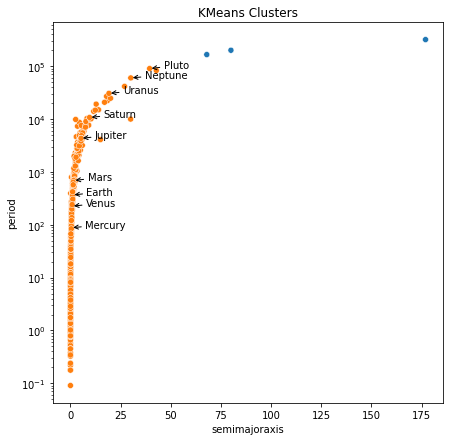

In [ ]:
kmeans_pipeline_2 = Pipeline([
    ('scale', StandardScaler()), 
    ('kmeans', KMeans(2, random_state=0))
]).fit(kmeans_data)

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(
    x=kmeans_data.semimajoraxis, 
    y=kmeans_data.period, 
    hue=kmeans_pipeline_2.predict(kmeans_data),
    ax=ax
)
ax.set_yscale('log')
solar_system = planets[planets.list == 'Solar System']
for planet in solar_system.name:
    data = solar_system.query(f'name == "{planet}"')
    ax.annotate(
        planet, 
        (data.semimajoraxis, data.period), 
        (7 + data.semimajoraxis, data.period),
        arrowprops=dict(arrowstyle='->')
    )
ax.get_legend().remove()
ax.set_title('KMeans Clusters')

In [ ]:
kmeans_pipeline_2.named_steps['kmeans'].cluster_centers_

array([[18.9113263 , 20.86736585],
       [-0.03463613, -0.03821862]])

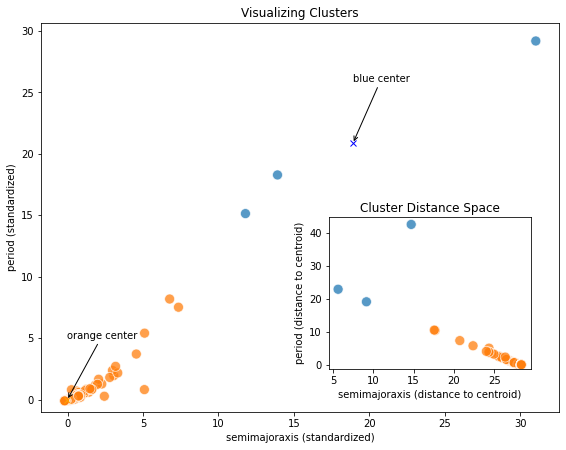

In [ ]:
# set up layout
fig = plt.figure(figsize=(8, 6))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.6, 0.2, 0.35, 0.35])

# scaled data and cluster distance data
scaled = kmeans_pipeline_2.named_steps['scale']\
    .fit_transform(kmeans_data)
cluster_distances = kmeans_pipeline_2\
    .fit_transform(kmeans_data)

for ax, data, title, axes_labels in zip(
    [outside, inside], [scaled, cluster_distances],  
    ['Visualizing Clusters', 'Cluster Distance Space'], 
    ['standardized', 'distance to centroid']
):
    sns.scatterplot(
        x=data[:,0], y=data[:,1], ax=ax, alpha=0.75, s=100,
        hue=kmeans_pipeline_2.named_steps['kmeans'].labels_
    )

    ax.get_legend().remove()
    ax.set_title(title)
    ax.set_xlabel(f'semimajoraxis ({axes_labels})')
    ax.set_ylabel(f'period ({axes_labels})')
    ax.set_ylim(-1, None)
    
# add the centroids to the outside plot
cluster_centers = kmeans_pipeline_2.named_steps['kmeans'].cluster_centers_
for color, centroid in zip(['blue', 'orange'], cluster_centers):
    outside.plot(*centroid, color=color, marker='x')
    outside.annotate(
        f'{color} center', xy=centroid, xytext=centroid + [0, 5], 
        arrowprops=dict(arrowstyle='->')
    )

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(kmeans_data, kmeans_pipeline.predict(kmeans_data)) 

0.7579771626036678

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(kmeans_data, kmeans_pipeline.predict(kmeans_data)) 

0.4632311032231894

In [ ]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(kmeans_data, kmeans_pipeline.predict(kmeans_data)) 

21207.276781867335

In [13]:
data = planets[
    ['semimajoraxis', 'period', 'mass', 'eccentricity']
].dropna()
X = data[['semimajoraxis', 'mass', 'eccentricity']]
y = data.period

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train, y_train)

In [ ]:
# get intercept
lm.intercept_

-622.9909910671811

In [ ]:
# get coefficients
[(col, coef) for col, coef in zip(X_train.columns, lm.coef_)]

[('semimajoraxis', 1880.4365990440929),
 ('mass', -90.18675916509196),
 ('eccentricity', -3201.078059333091)]

In [ ]:
preds = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Results')

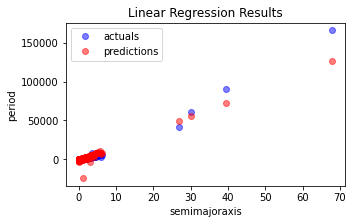

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
axes.plot(X_test.semimajoraxis, y_test, 'ob', label='actuals', alpha=0.5)
axes.plot(X_test.semimajoraxis, preds, 'or', label='predictions', alpha=0.5)
axes.set(xlabel='semimajoraxis', ylabel='period')
axes.legend()
axes.set_title('Linear Regression Results')

In [ ]:
np.corrcoef(y_test, preds)[0][1]

0.9692104355988059

array([<AxesSubplot:xlabel='Observation', ylabel='Residual'>,
       <AxesSubplot:xlabel='Residual', ylabel='Density'>], dtype=object)

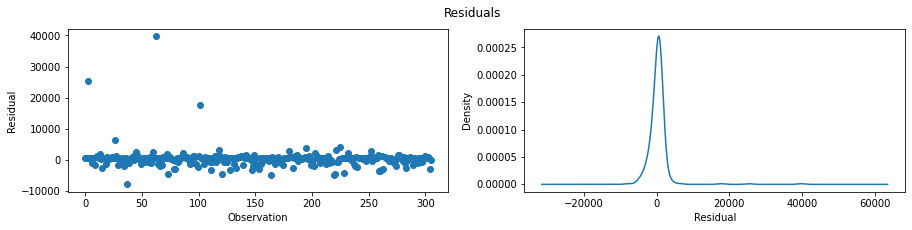

In [ ]:
from ml_utils.regression import plot_residuals

plot_residuals(y_test, preds)

In [ ]:
lm.score(X_test, y_test)

0.9209013475842684

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.9209013475842684

In [ ]:
from ml_utils.regression import adjusted_r2
adjusted_r2(lm, X_test, y_test)

0.9201155993814631

In [ ]:
anscombe = sns.load_dataset('anscombe').groupby('dataset')
anscombe.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

array([<AxesSubplot:title={'center':'I - linear'}, xlabel='x', ylabel='y'>,
       <AxesSubplot:title={'center':'II - non-linear'}, xlabel='x', ylabel='y'>,
       <AxesSubplot:title={'center':'III - linear with outlier'}, xlabel='x', ylabel='y'>,
       <AxesSubplot:title={'center':'IV - vertical with outlier'}, xlabel='x', ylabel='y'>],
      dtype=object)

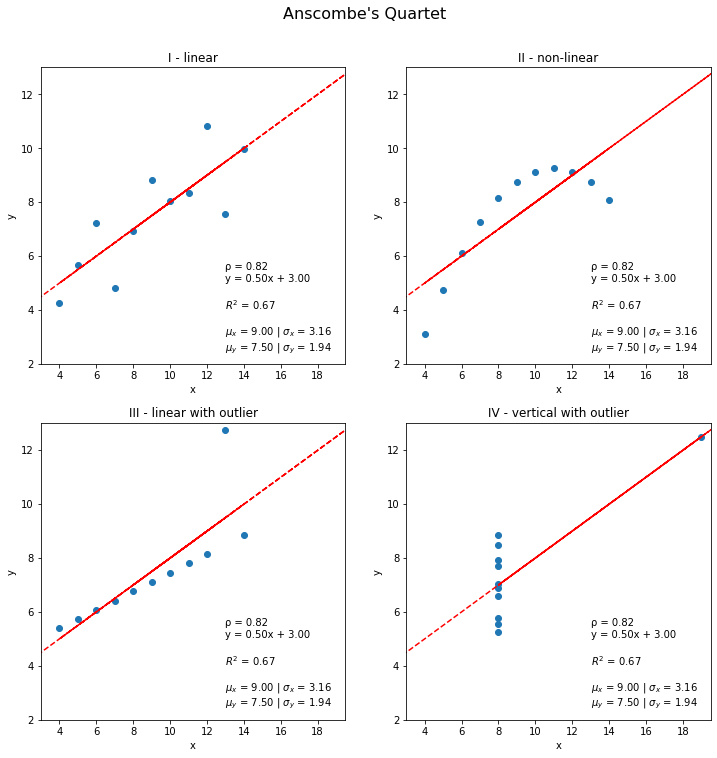

In [ ]:
from visual_aids import stats_viz
stats_viz.anscombes_quartet(r_squared=True)

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, preds)

0.9220144218429371

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, preds)

1369.441817073533

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, preds))

3248.499961928374

In [ ]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, preds)

759.8613358335442

This section takes the planetary data and performs some EDA to get an idea of what the dtata looks like. The data is analyszed and plotted for cluster anlysis and several methods are introduced to make the visuals more clear. Predictive functions are introduced as the basis for model evaluation. 

In [ ]:
import numpy as np
import pandas as pd

planets = pd.read_csv('data/planets.csv')
red_wine = pd.read_csv('data/winequality-red.csv')
wine = pd.concat([
    pd.read_csv('data/winequality-white.csv', sep=';').assign(kind='white'), 
    red_wine.assign(kind='red')
])

In [ ]:
from sklearn.model_selection import train_test_split

X = planets[['eccentricity', 'semimajoraxis', 'mass']]
y = planets.period

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [ ]:
X.shape, y.shape

((4094, 3), (4094,))

In [ ]:
X_train.shape, y_train.shape

((3070, 3), (3070,))

In [ ]:
X_test.shape, y_test.shape

((1024, 3), (1024,))

In [ ]:
X_train.head()

eccentricity  semimajoraxis  mass
1390           NaN            NaN   NaN
2837           NaN            NaN   NaN
3619           NaN         0.0701   NaN
1867           NaN            NaN   NaN
1869           NaN            NaN   NaN

In [ ]:
y_train.head()

1390     1.434742
2837    51.079263
3619     7.171000
1867    51.111024
1869    62.869161
Name: period, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

standardized = StandardScaler().fit_transform(X_train)

# examine some of the non-NaN values
standardized[~np.isnan(standardized)][:30]

array([-5.43618156e-02,  1.43278593e+00,  1.95196592e+00,  4.51498477e-03,
       -1.96265630e-01,  7.79591646e-02, -4.74717586e-02, -3.12856028e-01,
       -4.18101448e-01, -5.47587283e-02, -2.46399501e-01,  1.65946487e+00,
       -8.59044215e-01, -5.47511116e-02, -4.04573808e-01,  1.88194856e-01,
       -5.41905011e-02, -4.75421907e-01,  1.33077010e-01, -3.01831439e-02,
       -1.08822831e-01,  1.62409605e-01,  1.21526007e+01,  1.73149454e+00,
       -2.25664815e-02,  9.91013258e-01, -7.48808523e-01, -4.99260165e-02,
       -8.59044215e-01, -5.49264158e-02])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalized = MinMaxScaler().fit_transform(X_train)

# examine some of the non-NaN values
normalized[~np.isnan(normalized)][:30]

array([2.28055906e-05, 1.24474091e-01, 5.33472803e-01, 1.71374569e-03,
       1.83543340e-02, 1.77824268e-01, 2.20687839e-04, 1.07593965e-02,
       8.36820084e-02, 1.14062675e-05, 1.50885109e-02, 1.39240422e-01,
       0.00000000e+00, 1.16250178e-05, 4.78471239e-03, 1.98744770e-01,
       2.77257370e-05, 1.69522066e-04, 1.88284519e-01, 7.17216379e-04,
       2.40505371e-02, 6.24847487e-03, 8.22784793e-01, 4.91631799e-01,
       9.35966714e-04, 9.56961137e-02, 2.09205021e-02, 1.50201619e-04,
       0.00000000e+00, 6.59028789e-06])

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaled = RobustScaler().fit_transform(X_train)

# examine some of the non-NaN values
robust_scaled[~np.isnan(robust_scaled)][:30]

array([-5.64660112e-02,  3.90058747e+00,  1.87999087e+00,  4.32924097e+00,
        2.79222462e-01,  3.28542094e-01,  4.56771306e-01,  2.00431965e-02,
       -8.21355236e-02, -8.60318668e-02,  1.67775378e-01,  4.40449244e+00,
       -4.47182295e-01, -8.54645050e-02, -1.83844492e-01,  4.19803787e-01,
       -4.37048728e-02, -3.41339093e-01,  3.74172941e-01,  1.74459261e+00,
        4.73606911e-01,  1.60907419e+01,  2.77306263e+01,  1.69746749e+00,
        2.31195445e+00,  2.91853132e+00, -3.55920602e-01,  2.73954715e-01,
       -4.47182295e-01, -9.85228329e-02])

In [ ]:
np.where(wine.kind == 'red', 1, 0)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.preprocessing import LabelBinarizer

binary_labels = LabelBinarizer().fit(wine.kind)
binary_labels.inverse_transform(np.array([0, 1]))

array(['red', 'white'], dtype='<U5')

In [ ]:
from sklearn.preprocessing import Binarizer

pd.Series(
    Binarizer(threshold=6).fit_transform(red_wine.quality.values.reshape(-1, 1)).flatten()
).value_counts()

0    1382
1     217
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

pd.Series(LabelEncoder().fit_transform(pd.cut(
    red_wine.quality,
    bins=[-1, 3, 6, 10],
    labels=['0-3 (low)', '4-6 (med)', '7-10 (high)']
))).value_counts()

1    1372
2     217
0      10
dtype: int64

In [ ]:
planets.list.value_counts()

Confirmed planets                    3972
Controversial                          97
Retracted planet candidate             11
Solar System                            9
Kepler Objects of Interest              4
Planets in binary systems, S-type       1
Name: list, dtype: int64

In [ ]:
pd.get_dummies(planets.list).head()

Confirmed planets  Controversial  Kepler Objects of Interest  \
0                  1              0                           0   
1                  1              0                           0   
2                  1              0                           0   
3                  1              0                           0   
4                  0              1                           0   

   Planets in binary systems, S-type  Retracted planet candidate  Solar System  
0                                  0                           0             0  
1                                  0                           0             0  
2                                  0                           0             0  
3                                  0                           0             0  
4                                  0                           0             0

In [ ]:
pd.get_dummies(planets.list, drop_first=True).head()

Controversial  Kepler Objects of Interest  \
0              0                           0   
1              0                           0   
2              0                           0   
3              0                           0   
4              1                           0   

   Planets in binary systems, S-type  Retracted planet candidate  Solar System  
0                                  0                           0             0  
1                                  0                           0             0  
2                                  0                           0             0  
3                                  0                           0             0  
4                                  0                           0             0

In [ ]:
from sklearn.preprocessing import LabelBinarizer

LabelBinarizer().fit_transform(planets.list)

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0]])

In [ ]:
planets[['semimajoraxis', 'mass', 'eccentricity']].tail()

semimajoraxis    mass  eccentricity
4089        0.08150  1.9000         0.000
4090        0.04421  0.7090         0.038
4091            NaN  0.3334         0.310
4092            NaN  0.4000         0.270
4093            NaN  0.4200         0.160

In [ ]:
from sklearn.impute import SimpleImputer

SimpleImputer().fit_transform(
    planets[['semimajoraxis', 'mass', 'eccentricity']]
)

array([[ 1.29      , 19.4       ,  0.231     ],
       [ 1.54      , 11.2       ,  0.08      ],
       [ 0.83      ,  4.8       ,  0.        ],
       ...,
       [ 5.83796389,  0.3334    ,  0.31      ],
       [ 5.83796389,  0.4       ,  0.27      ],
       [ 5.83796389,  0.42      ,  0.16      ]])

In [ ]:
from sklearn.impute import SimpleImputer

SimpleImputer(strategy='median').fit_transform(
    planets[['semimajoraxis', 'mass', 'eccentricity']]
)

array([[ 1.29  , 19.4   ,  0.231 ],
       [ 1.54  , 11.2   ,  0.08  ],
       [ 0.83  ,  4.8   ,  0.    ],
       ...,
       [ 0.1409,  0.3334,  0.31  ],
       [ 0.1409,  0.4   ,  0.27  ],
       [ 0.1409,  0.42  ,  0.16  ]])

In [ ]:
from sklearn.impute import KNNImputer

KNNImputer().fit_transform(
    planets[['semimajoraxis', 'mass', 'eccentricity']]
)

array([[ 1.29    , 19.4     ,  0.231   ],
       [ 1.54    , 11.2     ,  0.08    ],
       [ 0.83    ,  4.8     ,  0.      ],
       ...,
       [ 0.404726,  0.3334  ,  0.31    ],
       [ 0.85486 ,  0.4     ,  0.27    ],
       [ 0.15324 ,  0.42    ,  0.16    ]])

In [ ]:
from sklearn.impute import MissingIndicator

MissingIndicator().fit_transform(
    planets[['semimajoraxis', 'mass', 'eccentricity']]
)

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [ ]:
from sklearn.preprocessing import FunctionTransformer

FunctionTransformer(
    np.abs, validate=True
).fit_transform(X_train.dropna())

array([[0.51   , 4.94   , 1.45   ],
       [0.17   , 0.64   , 0.85   ],
       [0.08   , 0.03727, 1.192  ],
       ...,
       [0.295  , 4.46   , 1.8    ],
       [0.34   , 0.0652 , 0.0087 ],
       [0.3    , 1.26   , 0.5    ]])

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ColumnTransformer([
    ('impute', KNNImputer(), [0]),
    ('standard_scale', StandardScaler(), [1]),
    ('min_max', MinMaxScaler(), [2])
]).fit_transform(X_train)[10:15]

array([[ 0.17      , -0.04747176,  0.0107594 ],
       [ 0.08      , -0.05475873,  0.01508851],
       [ 0.15585591,         nan,  0.13924042],
       [ 0.15585591,         nan,         nan],
       [ 0.        , -0.05475111,  0.00478471]])

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical = [
    col for col in planets.columns
    if col in [
        'list', 'name', 'description', 
        'discoverymethod', 'lastupdate'
    ]
]
numeric = [col for col in planets.columns if col not in categorical]

make_column_transformer(
    (StandardScaler(), numeric),
    (OneHotEncoder(sparse=False), categorical)
).fit_transform(planets.dropna())

array([[ 3.09267587, -0.2351423 , -0.40487424, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.432445  , -0.24215395, -0.28360905, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13665505, -0.24208849, -0.62800218, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.83289954, -0.76197788, -0.84918988, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.25813535,  0.38683239, -0.92873984, ...,  0.        ,
         0.        ,  0.        ],
       [-0.26827931, -0.21657671, -0.70076129, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Pipeline([('scale', StandardScaler()), ('lr', LinearRegression())])

Pipeline(steps=[('scale', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

ColumnTransformer([
    ('impute', Pipeline([
        ('impute', KNNImputer()), ('scale', StandardScaler())
    ]), [0]),
    ('standard_scale', StandardScaler(), [1]),
    ('min_max', MinMaxScaler(), [2])
]).fit_transform(X_train)[10:15]

array([[ 0.13531604, -0.04747176,  0.0107594 ],
       [-0.7257111 , -0.05475873,  0.01508851],
       [ 0.        ,         nan,  0.13924042],
       [ 0.        ,         nan,         nan],
       [-1.49106856, -0.05475111,  0.00478471]])

In [ ]:
Pipeline([
    (
        'preprocessing', 
        ColumnTransformer([
            ('impute', Pipeline([
                ('impute', KNNImputer()), ('scale', StandardScaler())
            ]), [0]),
            ('standard_scale', StandardScaler(), [1]),
            ('min_max', MinMaxScaler(), [2])
        ])
    ),
    ('model', LinearRegression())
])

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('impute',
                                                  Pipeline(steps=[('impute',
                                                                   KNNImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  [0]),
                                                 ('standard_scale',
                                                  StandardScaler(), [1]),
                                                 ('min_max', MinMaxScaler(),
                                                  [2])])),
                ('model', LinearRegression())])

In [ ]:
from sklearn.pipeline import make_pipeline

make_pipeline(StandardScaler(), LinearRegression())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

The previous section predominantly deals with using sklearn to preprocess data for further machine analysis. Many of the functions involve transforming the data array to be used in a machine learning way. It also discussed different ways of dealing with missing or incongruent data.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
red_wine = pd.read_csv('data/winequality-red.csv')
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<AxesSubplot:title={'center':'Red Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

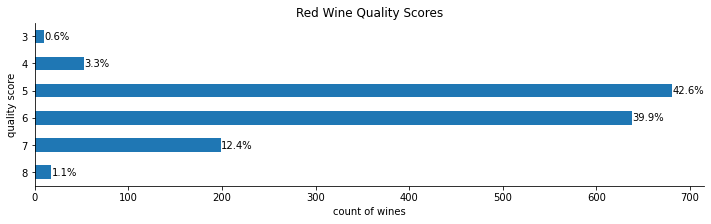

In [ ]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores', figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

plot_quality_scores(red_wine, 'red')

In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
red_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [ ]:
red_wine['high_quality'] = pd.cut(red_wine.quality, bins=[0, 6, 10], labels=[0, 1])
red_wine.high_quality.value_counts(normalize=True)

0    0.86429
1    0.13571
Name: high_quality, dtype: float64

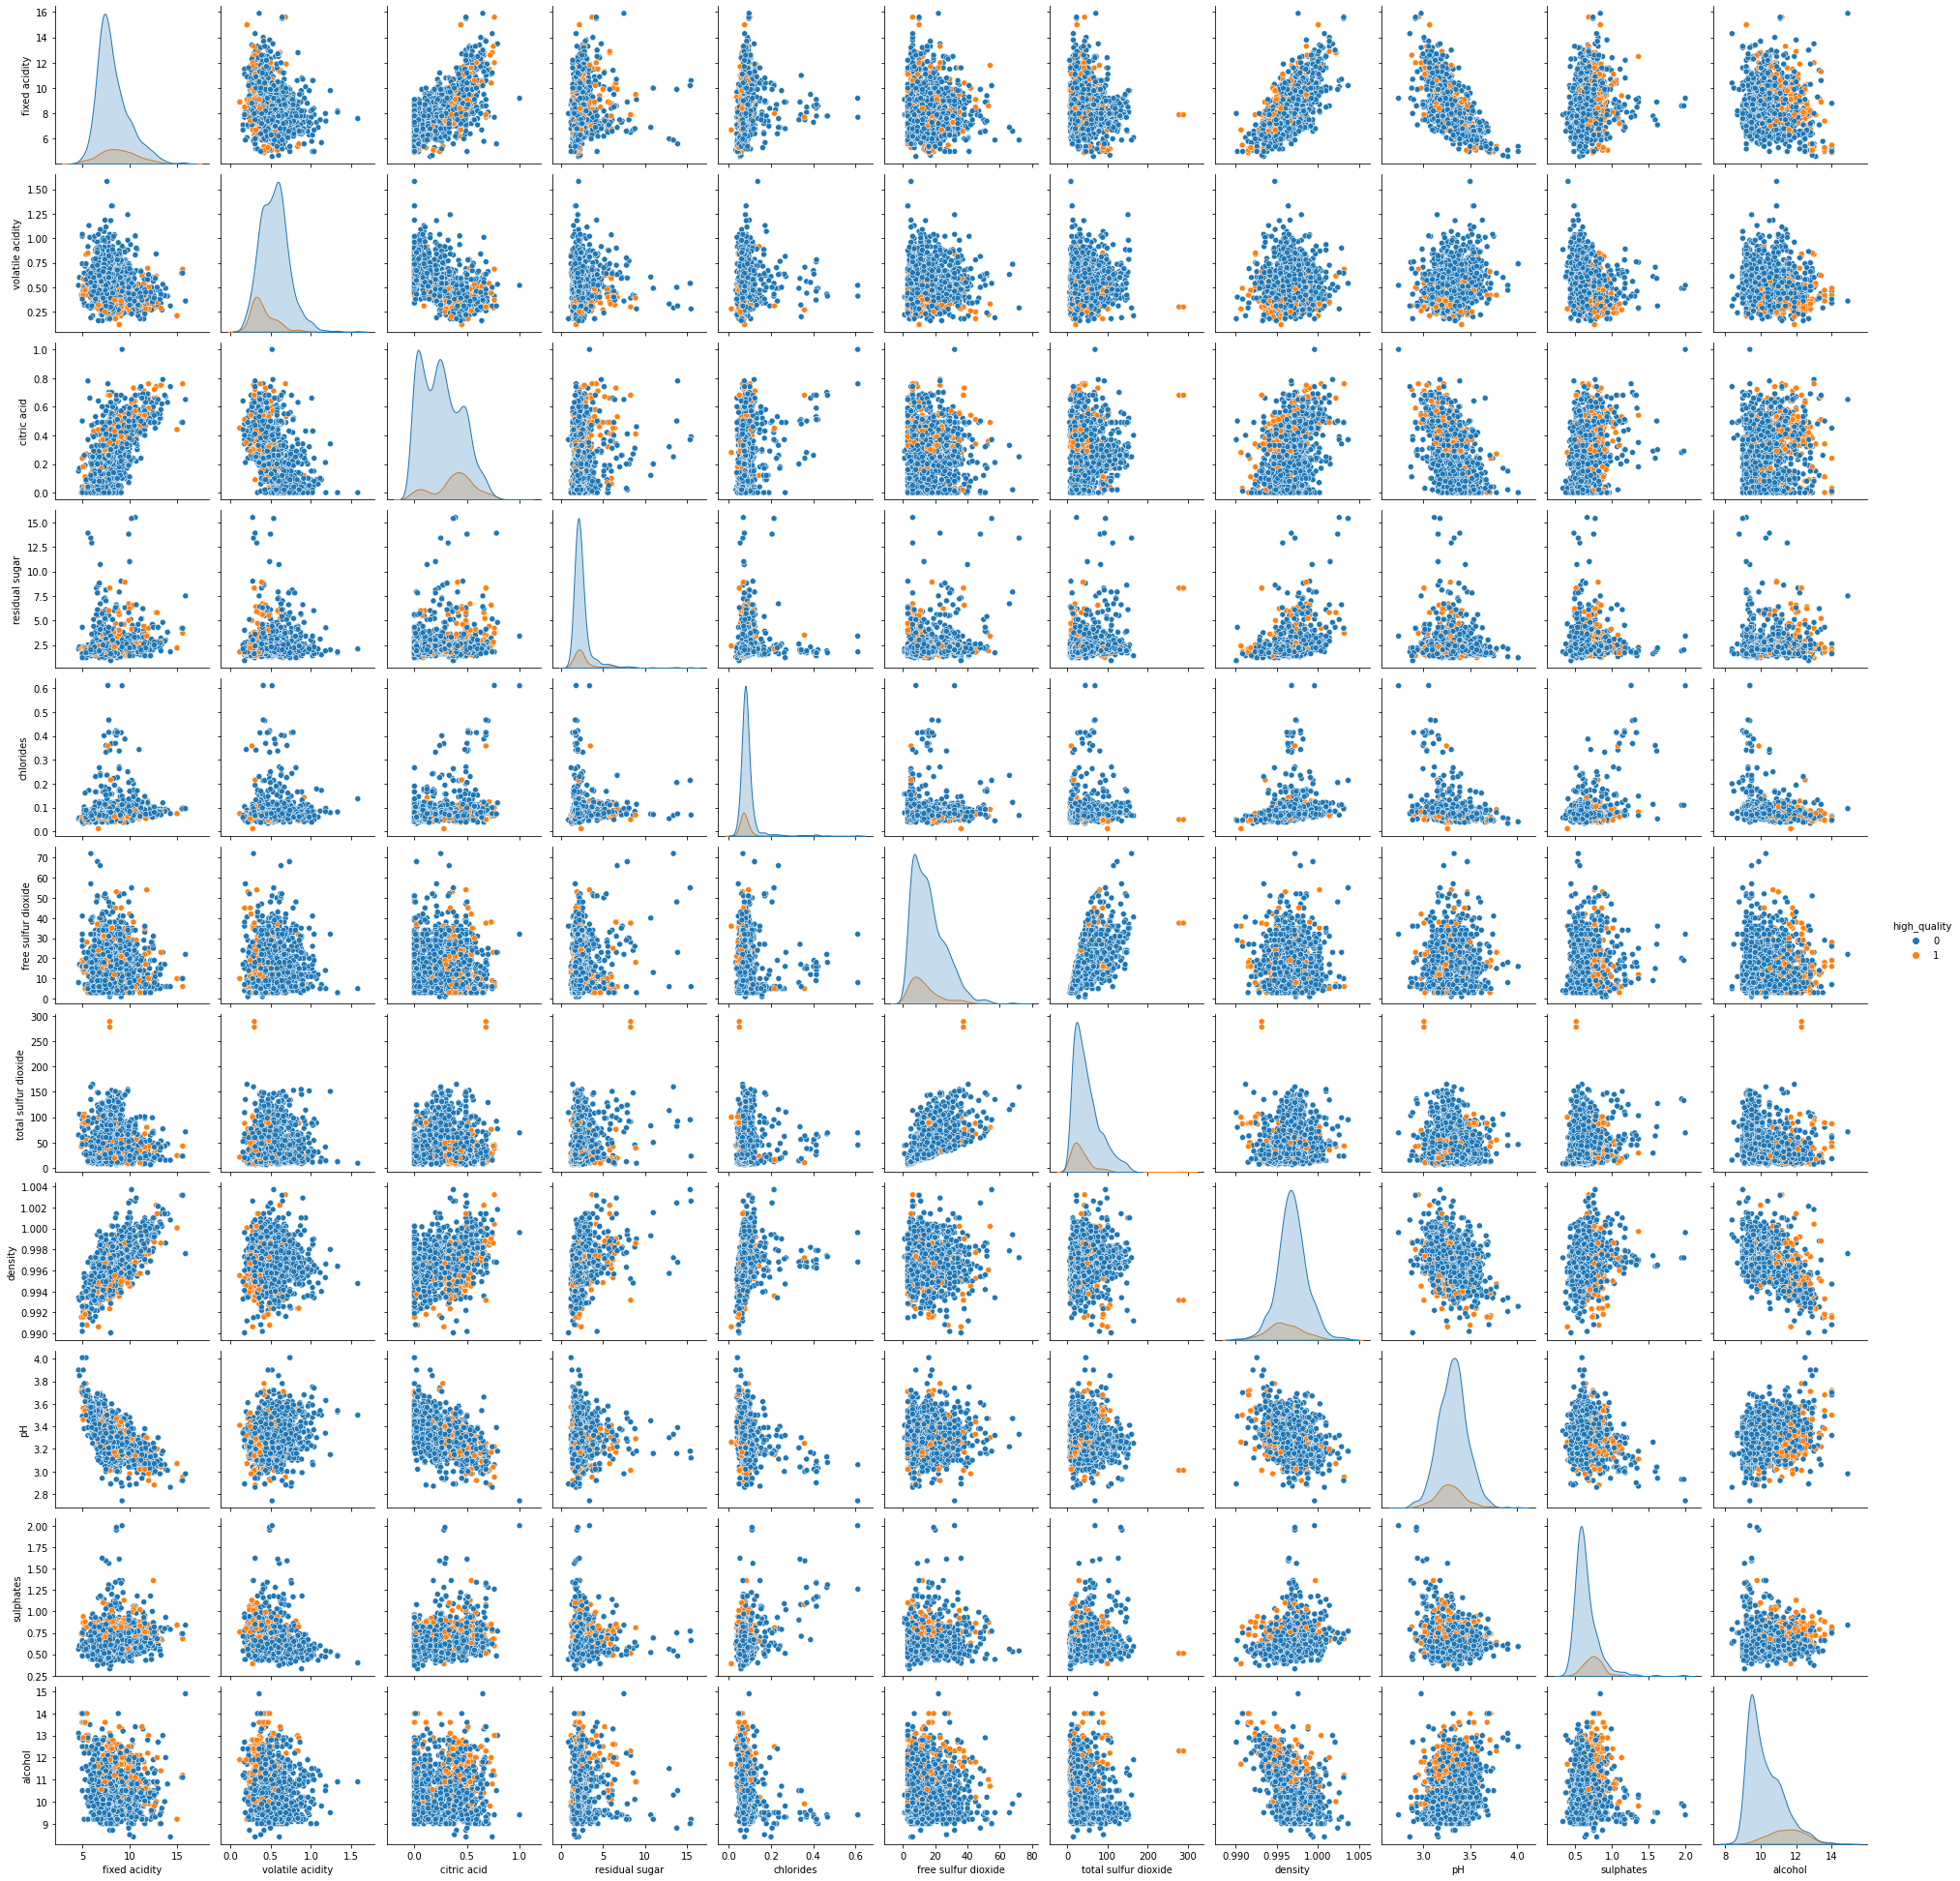

In [ ]:
sns.pairplot(red_wine.drop(columns='quality'), hue='high_quality')

[<AxesSubplot:title={'center':'Logistic Sigmoid Function'}, xlabel='x', ylabel='y'>]

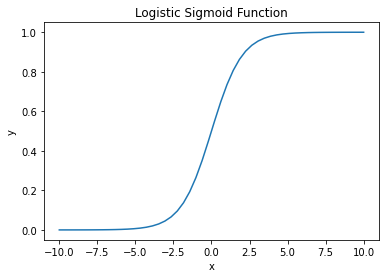

In [ ]:
from visual_aids import ml_viz
ml_viz.logistic_sigmoid()

In [ ]:
from sklearn.model_selection import train_test_split

# 1
red_y = red_wine.pop('high_quality')
red_X = red_wine.drop(columns='quality')

# 2
r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(
    red_X, red_y, test_size=0.1, random_state=0, stratify=red_y
)

In [ ]:
red_y.value_counts(normalize=True)

0    0.86429
1    0.13571
Name: high_quality, dtype: float64

In [ ]:
r_y_train.value_counts(normalize=True)

0    0.864489
1    0.135511
Name: high_quality, dtype: float64

In [ ]:
r_y_test.value_counts(normalize=True)

0    0.8625
1    0.1375
Name: high_quality, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

red_quality_lr = Pipeline([
    ('scale', StandardScaler()), 
    ('lr', LogisticRegression(
        class_weight='balanced', random_state=0
    ))
])

In [ ]:
red_quality_lr.fit(r_X_train, r_y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [ ]:
quality_preds = red_quality_lr.predict(r_X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

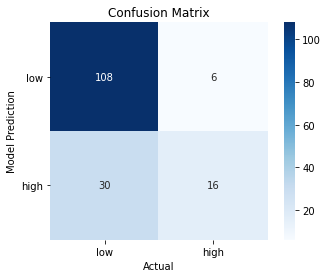

In [ ]:
from ml_utils.classification import confusion_matrix_visual

confusion_matrix_visual(r_y_test, quality_preds, ['low', 'high'])

In [ ]:
# mean accuracy
red_quality_lr.score(r_X_test, r_y_test)

0.775

In [ ]:
from sklearn.metrics import zero_one_loss
zero_one_loss(r_y_test, quality_preds)

0.22499999999999998

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(r_y_test, quality_preds))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86       138
           1       0.35      0.73      0.47        22

    accuracy                           0.78       160
   macro avg       0.65      0.75      0.66       160
weighted avg       0.86      0.78      0.80       160



<AxesSubplot:title={'center':'Portion of Confusion Matrix Considered'}, xlabel='Actual', ylabel='Predicted'>

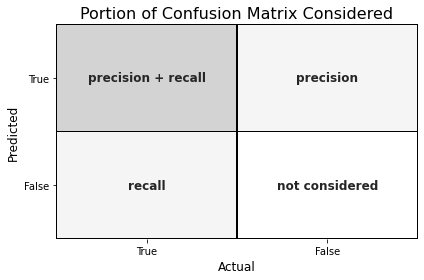

In [ ]:
ml_viz.portion_of_confusion_matrix_considered({'precision', 'recall'})

<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

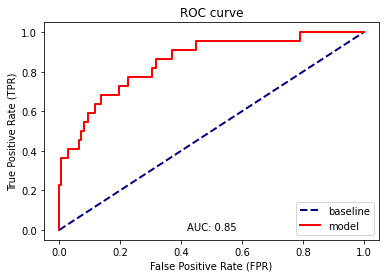

In [ ]:
from ml_utils.classification import plot_roc

plot_roc(r_y_test, red_quality_lr.predict_proba(r_X_test)[:,1])

<AxesSubplot:title={'center':'Precision-recall curve\n AP: 0.61 | AUC: 0.6'}, xlabel='Recall', ylabel='Precision'>

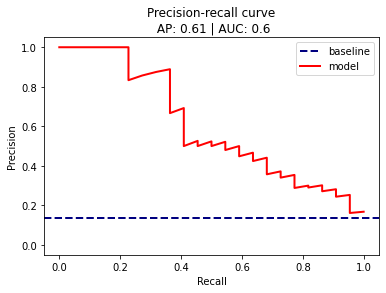

In [ ]:
from ml_utils.classification import plot_pr_curve

plot_pr_curve(r_y_test, red_quality_lr.predict_proba(r_X_test)[:,1])

This section dealt with wine data and hwo it can be formatted in a way to be able to correlate wines with different quality levels. Some of the methods from the beginning of the chapter are revisited to pre process data and put itin a form that can be digested and improved using machine learning models.

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
red_wine = pd.read_csv('data/winequality-red.csv')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

In [ ]:
white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [ ]:
red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<AxesSubplot:title={'center':'White Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

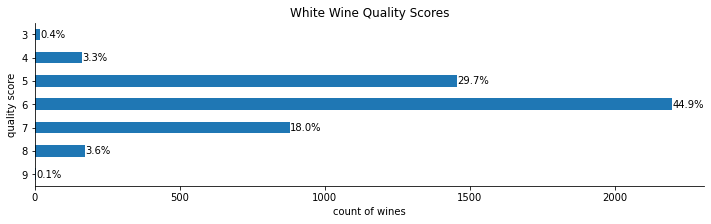

In [ ]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores', figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(), 
            bar.get_y() + bar.get_height()/2, 
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax

plot_quality_scores(white_wine, 'white')

<AxesSubplot:title={'center':'Red Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

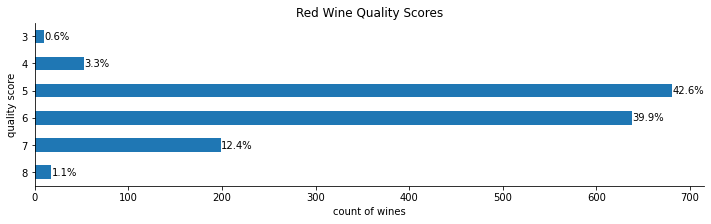

In [ ]:
plot_quality_scores(red_wine, 'red')

In [ ]:
wine = pd.concat([
    white_wine.assign(kind='white'), red_wine.assign(kind='red')
])
wine.sample(5, random_state=10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
848             6.4              0.64         0.21             1.8      0.081   
2529            6.6              0.42         0.13            12.8      0.044   
131             5.6              0.50         0.09             2.3      0.049   
244            15.0              0.21         0.44             2.2      0.075   
1551            6.6              0.19         0.99             1.2      0.122   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
848                  14.0                  31.0  0.99689  3.59       0.66   
2529                 26.0                 158.0  0.99772  3.24       0.47   
131                  17.0                  99.0  0.99370  3.63       0.63   
244                  10.0                  24.0  1.00005  3.07       0.84   
1551                 45.0                 129.0  0.99360  3.09       0.31   

      alcohol  quality   kind  
848       9.8        5    red  
2529      9.0        5  white  
131      13.0        5    red  
244       9.2        7    red  
1551      8.7        6  white

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [ ]:
wine.kind.value_counts()

white    4898
red      1599
Name: kind, dtype: int64

In [ ]:
wine.drop(columns='quality').groupby('kind').describe()

fixed acidity                                                \
              count      mean       std  min  25%  50%  75%   max   
kind                                                                
red          1599.0  8.319637  1.741096  4.6  7.1  7.9  9.2  15.9   
white        4898.0  6.854788  0.843868  3.8  6.3  6.8  7.3  14.2   

      volatile acidity            ... sulphates       alcohol             \
                 count      mean  ...       75%   max   count       mean   
kind                              ...                                      
red             1599.0  0.527821  ...      0.73  2.00  1599.0  10.422983   
white           4898.0  0.278241  ...      0.55  1.08  4898.0  10.514267   

                                             
            std  min  25%   50%   75%   max  
kind                                         
red    1.065668  8.4  9.5  10.2  11.1  14.9  
white  1.230621  8.0  9.5  10.4  11.4  14.2  

[2 rows x 88 columns]

<AxesSubplot:>

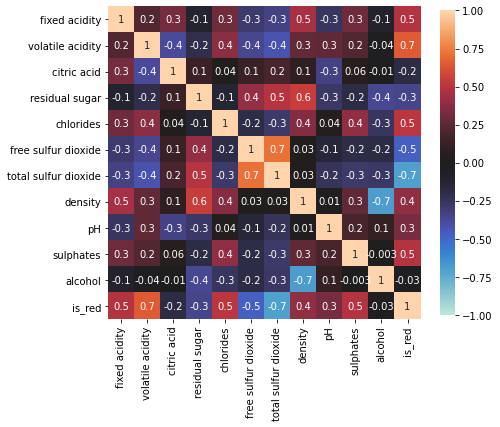

In [ ]:
fig = plt.figure(figsize=(7, 7))
sns.heatmap(
    wine.drop(columns='quality').assign(
        is_red=lambda x: np.where(x.kind == 'red', 1, 0)
    ).corr(), 
    cbar_kws={'shrink': 0.8},
    center=0, vmin=-1, vmax=1,
    square=True, annot=True, fmt='.1g'
)

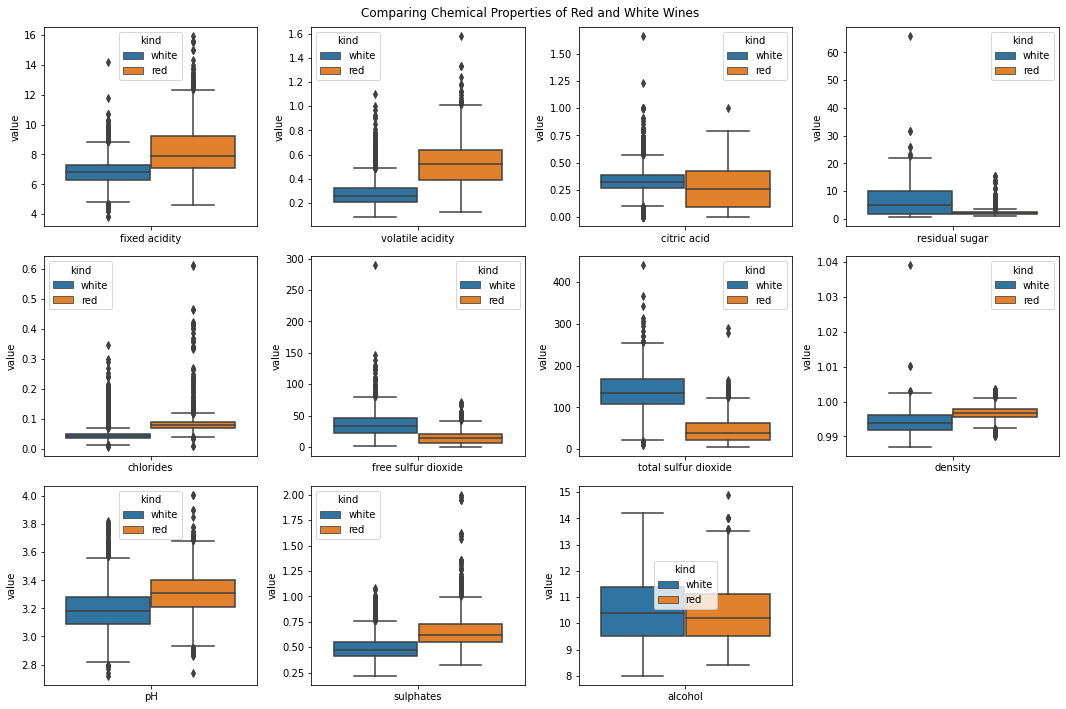

In [ ]:
import math

chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]
melted = wine.drop(columns='quality').melt(id_vars=['kind'])

fig, axes = plt.subplots(math.ceil(len(chemical_properties) / 4), 4, figsize=(15, 10))
axes = axes.flatten()

for prop, ax in zip(chemical_properties, axes):
    sns.boxplot(
        data=melted[melted.variable.isin([prop])], 
        x='variable', y='value', hue='kind', ax=ax
    ).set_xlabel('')
    
# remove the extra subplots
for ax in axes[len(chemical_properties):]:
    ax.remove()

plt.suptitle('Comparing Chemical Properties of Red and White Wines')
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split

# 1
wine_y = np.where(wine.kind == 'red', 1, 0)
wine_X = wine.drop(columns=['quality', 'kind'])

# 2
w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(
    wine_X, wine_y, test_size=0.25, random_state=0, stratify=wine_y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

white_or_red = Pipeline([
    ('scale', StandardScaler()), 
    ('lr', LogisticRegression(random_state=0))
]).fit(w_X_train, w_y_train)

In [ ]:
kind_preds = white_or_red.predict(w_X_test)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

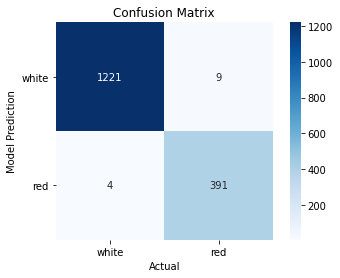

In [ ]:
from ml_utils.classification import confusion_matrix_visual

confusion_matrix_visual(w_y_test, kind_preds, ['white', 'red'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(w_y_test, kind_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       0.99      0.98      0.98       400

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



<AxesSubplot:title={'center':'Portion of Confusion Matrix Considered'}, xlabel='Actual', ylabel='Predicted'>

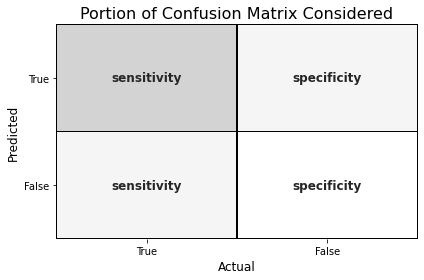

In [ ]:
from visual_aids import ml_viz
ml_viz.portion_of_confusion_matrix_considered({'sensitivity', 'specificity'})

<AxesSubplot:title={'center':'Sample ROC Curves'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

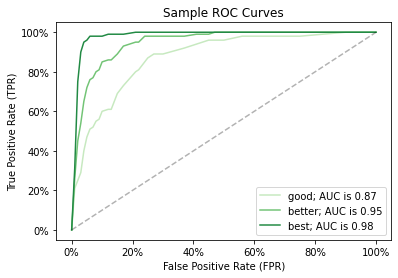

In [ ]:
ml_viz.roc_curve()

<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

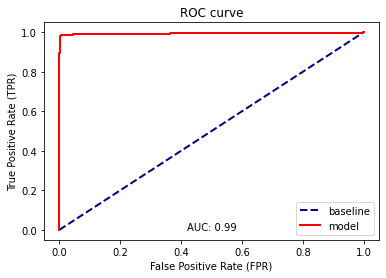

In [ ]:
from ml_utils.classification import plot_roc

plot_roc(w_y_test, white_or_red.predict_proba(w_X_test)[:,1])

<AxesSubplot:title={'center':'Precision-recall curve\n AP: 0.99 | AUC: 0.99'}, xlabel='Recall', ylabel='Precision'>

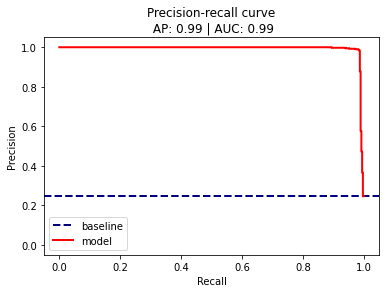

In [ ]:
from ml_utils.classification import plot_pr_curve

plot_pr_curve(w_y_test, white_or_red.predict_proba(w_X_test)[:,1])

This section deals with analyzing wine data to make predictions about quality based on chemical properties. the wine data is imported and concatenated, then processed to allow for classification and comparison.

1. Build a clustering model to distinguish between red and white wine by their
chemical properties:
a) Combine the red and white wine datasets (data/winequality-red.csv
and data/winequality-white.csv, respectively) and add a column for the
kind of wine (red or white).
b) Perform some initial EDA.
c) Build and fit a pipeline that scales the data and then uses k-means clustering to
make two clusters. Be sure not to use the quality column.
d) Use the Fowlkes-Mallows Index (the fowlkes_mallows_score() function
is in sklearn.metrics) to evaluate how well k-means is able to make the
distinction between red and white wine.
e) Find the center of each cluster

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

red_wine = pd.read_csv('data/winequality-red.csv')
white_wine = pd.read_csv('data/winequality-white.csv', sep=';')

wine = pd.concat([
    white_wine.assign(kind='white'), red_wine.assign(kind='red')
])
wine.sample(5, random_state=10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
848             6.4              0.64         0.21             1.8      0.081   
2529            6.6              0.42         0.13            12.8      0.044   
131             5.6              0.50         0.09             2.3      0.049   
244            15.0              0.21         0.44             2.2      0.075   
1551            6.6              0.19         0.99             1.2      0.122   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
848                  14.0                  31.0  0.99689  3.59       0.66   
2529                 26.0                 158.0  0.99772  3.24       0.47   
131                  17.0                  99.0  0.99370  3.63       0.63   
244                  10.0                  24.0  1.00005  3.07       0.84   
1551                 45.0                 129.0  0.99360  3.09       0.31   

      alcohol  quality   kind  
848       9.8        5    red  
2529      9.0        5  white  
131      13.0        5    red  
244       9.2        7    red  
1551      8.7        6  white

In [41]:
# Look at the structure of the combined dataset
wine.info()
wine.describe()

# Check some random samples to see how data is structured
wine.sample(5, random_state=10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
848             6.4              0.64         0.21             1.8      0.081   
2529            6.6              0.42         0.13            12.8      0.044   
131             5.6              0.50         0.09             2.3      0.049   
244            15.0              0.21         0.44             2.2      0.075   
1551            6.6              0.19         0.99             1.2      0.122   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
848                  14.0                  31.0  0.99689  3.59       0.66   
2529                 26.0                 158.0  0.99772  3.24       0.47   
131                  17.0                  99.0  0.99370  3.63       0.63   
244                  10.0                  24.0  1.00005  3.07       0.84   
1551                 45.0                 129.0  0.99360  3.09       0.31   

      alcohol  quality   kind  
848       9.8        5    red  
2529      9.0        5  white  
131      13.0        5    red  
244       9.2        7    red  
1551      8.7        6  white

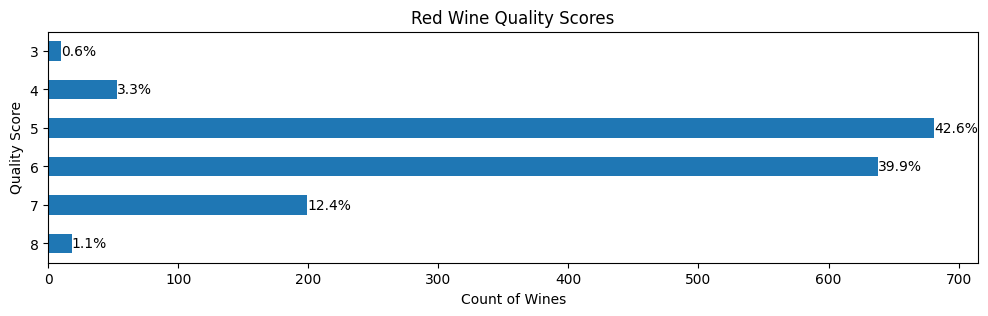

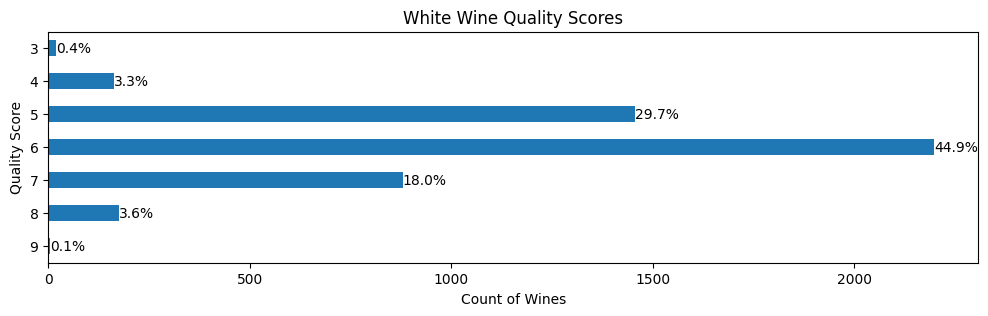

In [42]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores',
        figsize=(12, 3)
    )
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(),
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('Count of Wines')
    plt.ylabel('Quality Score')
    return ax

# Plot for red wine
plot_quality_scores(red_wine, 'red')
plt.show()

# Plot for white wine
plot_quality_scores(white_wine, 'white')
plt.show()


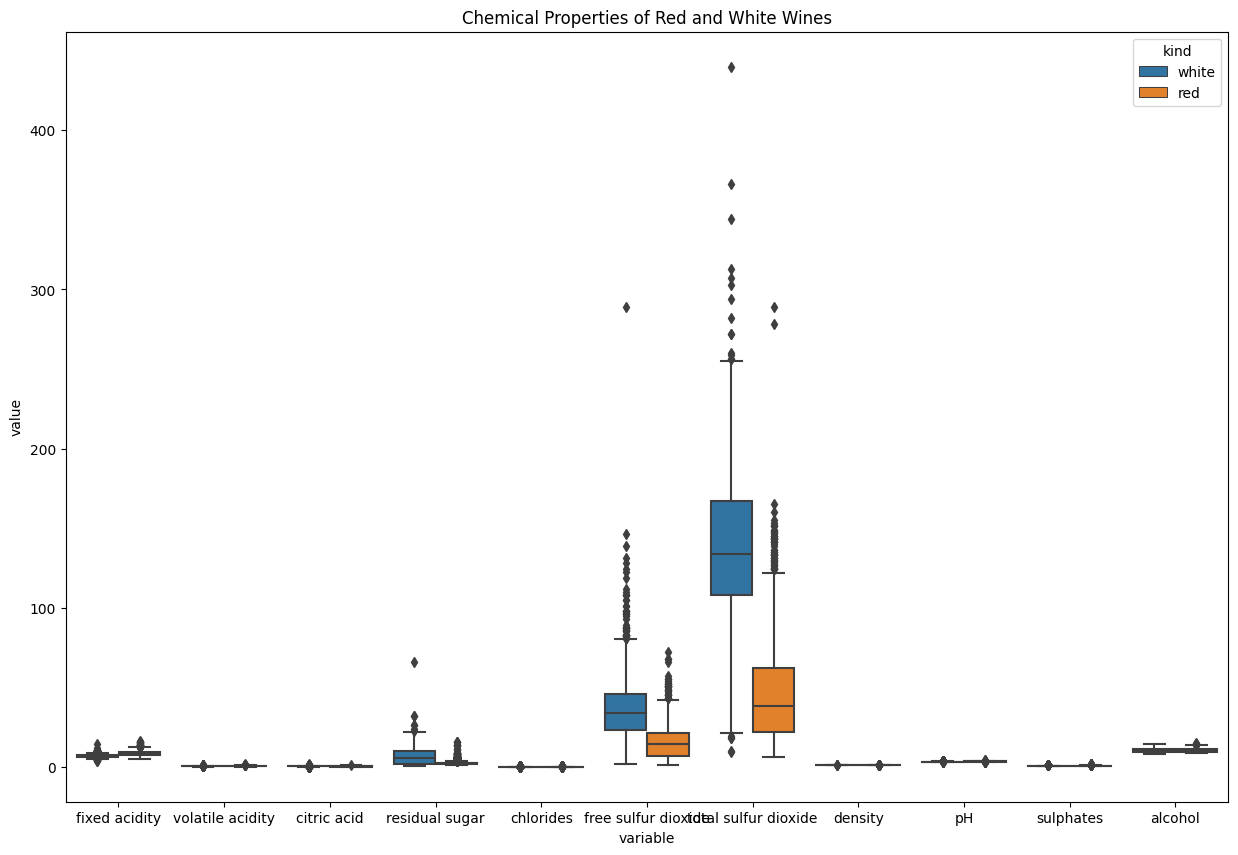

In [43]:
# List of chemical properties (features)
chemical_properties = [col for col in wine.columns if col not in ['quality', 'kind']]

# Melt the DataFrame for easy seaborn plotting
melted = wine.melt(id_vars=['kind'], value_vars=chemical_properties)

# Plot boxplots for each chemical property
plt.figure(figsize=(15, 10))
sns.boxplot(x='variable', y='value', hue='kind', data=melted)
plt.title('Chemical Properties of Red and White Wines')
plt.show()


In [44]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (excluding 'quality' and 'kind')
X = wine.drop(columns=['quality', 'kind'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [45]:
from sklearn.cluster import KMeans

# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model and get the cluster labels
wine['cluster'] = kmeans.fit_predict(X_scaled)


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

# Map 'kind' column to numerical labels (0 for red, 1 for white)
wine['true_label'] = np.where(wine['kind'] == 'red', 0, 1)

# Evaluate clustering performance using confusion matrix and classification report
print(confusion_matrix(wine['true_label'], wine['cluster']))
print(classification_report(wine['true_label'], wine['cluster']))


[[  24 1575]
 [4829   69]]
              precision    recall  f1-score   support

           0       0.00      0.02      0.01      1599
           1       0.04      0.01      0.02      4898

    accuracy                           0.01      6497
   macro avg       0.02      0.01      0.01      6497
weighted avg       0.03      0.01      0.02      6497



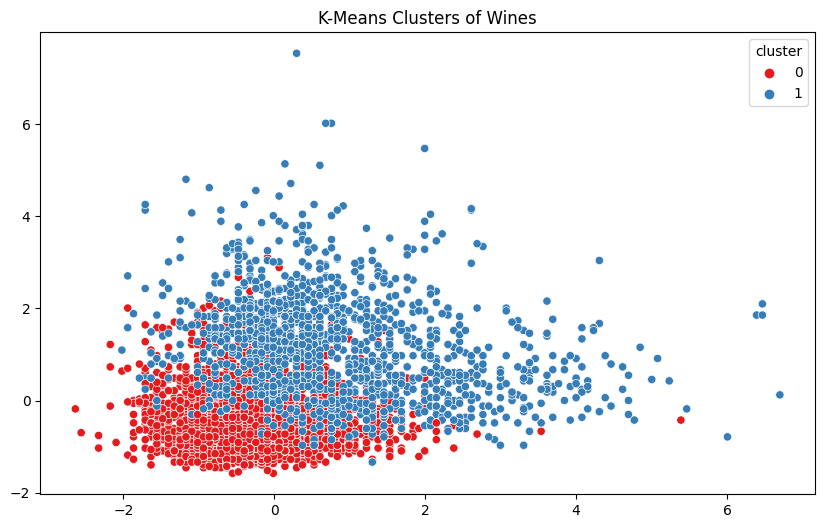

In [47]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=wine['cluster'], palette='Set1')
plt.title('K-Means Clusters of Wines')
plt.show()


Predict star temperature:
a) Using the data/stars.csv file, perform some initial EDA and then build
a linear regression model of all the numeric columns to predict the temperature
of the star.
b) Train the model on 75% of the initial data.
c) Calculate the R2 and RMSE of the model.
d) Find the coefficients for each regressor and the intercept of the linear regression
equation.
e) Visualize the residuals using the plot_residuals() function from the
ml_utils.regression module.


In [58]:
import pandas as pd

# Load the stars data
stars = pd.read_csv('data/stars.csv')

# Drop the 'name' column as it is not useful for regression
stars = stars.drop(columns=['name'])

# Apply one-hot encoding to the 'spectraltype' column
stars_encoded = pd.get_dummies(stars, columns=['spectraltype'])

# Check the first few rows of the processed data
print(stars_encoded.head())

    magJ   magV  radius  temperature   magK  mass   magH   magB  metallicity  \
0  2.943  4.740  19.000       4742.0  2.282  2.70  2.484  5.740       -0.350   
1  2.876  5.024  24.080       4340.0  1.939  1.80  2.091  6.415        0.040   
2  3.019  5.220  11.000       4813.0  2.331  2.20  2.608  6.240       -0.240   
3  5.158  6.670   0.708       5311.0  4.714  1.00  4.803  7.570        0.430   
4  5.090  5.950   1.243       5825.0  4.430  1.11  4.720  6.590        0.096   

   planets  ...  spectraltype_T7.5  spectraltype_T9  spectraltype_T9.5  \
0      1.0  ...                  0                0                  0   
1      1.0  ...                  0                0                  0   
2      1.0  ...                  0                0                  0   
3      2.0  ...                  0                0                  0   
4      0.0  ...                  0                0                  0   

   spectraltype_WD  spectraltype_Y0.5  spectraltype_kA5hF0mA5 V  \
0      

In [61]:
from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
stars_imputed = imputer.fit_transform(stars_encoded)

# Convert the imputed data back into a DataFrame
stars_imputed = pd.DataFrame(stars_imputed, columns=stars_encoded.columns)

# Define the target variable (y) and predictors (X)
X = stars_imputed.drop(columns=['temperature'])  # Drop the target column
y = stars_imputed['temperature']

# Split the data into training (75%) and test (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Output the intercept and coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_[:5]}')  # Printing first 5 coefficients as an example

# Evaluate the model using R2 and RMSE
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)

# R² score
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')




Intercept: 6172.2556248112705
Coefficients: [-826.49161973 -238.63950597   10.28979096 1316.48914991  532.67708407]
R²: -5.4133074684265936e+20
RMSE: 20688392023473.984


In [62]:
# Print all the coefficients along with their corresponding feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Display the coefficients
print(coefficients)


                      Feature  Coefficient
0                        magJ  -826.491620
1                        magV  -238.639506
2                      radius    10.289791
3                        magK  1316.489150
4                        mass   532.677084
..                        ...          ...
379  spectraltype_kA5hF0mA5 V   411.562500
380          spectraltype_sdB     0.000000
381        spectraltype_sdB+M     0.000000
382         spectraltype_sdBV     0.000000
383         spectraltype_sdL5     0.000000

[384 rows x 2 columns]


array([<AxesSubplot:xlabel='Observation', ylabel='Residual'>,
       <AxesSubplot:xlabel='Residual', ylabel='Density'>], dtype=object)

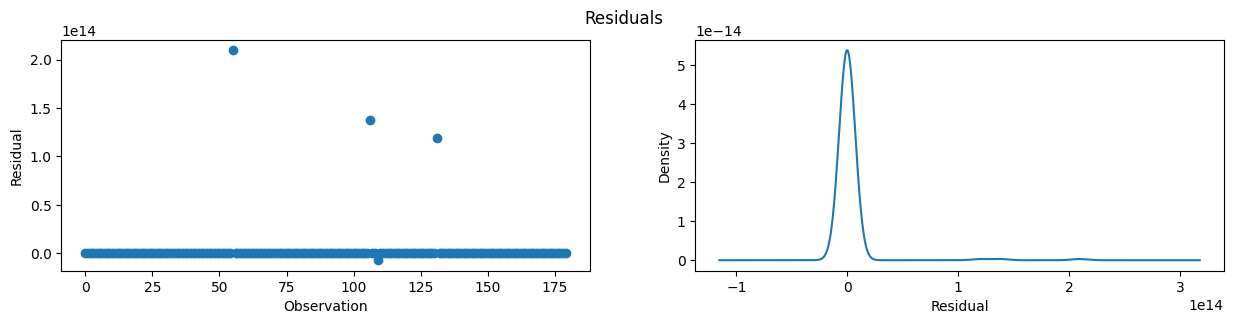

In [63]:
from ml_utils.regression import plot_residuals  # Assuming you have this utility

# Visualize the residuals (difference between actual and predicted values)
plot_residuals(y_test, y_pred)


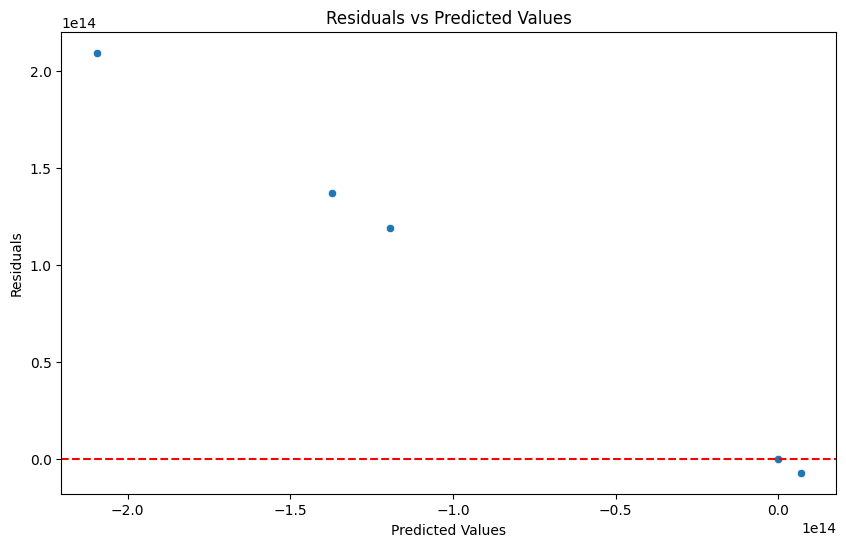

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate residuals (actual - predicted)
residuals = y_test - y_pred

# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


Classify planets that have shorter years than Earth:
a) Using the data/planets.csv file, build a logistic regression model with the
eccentricity, semimajoraxis, and mass columns as regressors. You will
need to make a new column to use for the y (year shorter than Earth).
b) Find the accuracy score.
c) Use the classification_report() function from scikit-learn to see
the precision, recall, and F1 score for each class.
d) With the plot_roc() function from the ml_utils.classification
module, plot the ROC curve.
e) Create a confusion matrix using the confusion_matrix_visual() function
from the ml_utils.classification module

In [66]:
import pandas as pd

# Load the planets dataset
planets = pd.read_csv('data/planets.csv')

# Check the column names
print(planets.columns)



Index(['eccentricity', 'periastron', 'semimajoraxis', 'periastrontime',
       'lastupdate', 'list', 'discoverymethod', 'period', 'discoveryyear',
       'mass', 'description', 'name'],
      dtype='object')


In [67]:
# Create a new binary target column: True if orbital period is less than Earth's (365.25 days)
planets['year_shorter_than_earth'] = planets['period'] < 365.25

# Select the relevant columns for logistic regression
X = planets[['eccentricity', 'semimajoraxis', 'mass']]
y = planets['year_shorter_than_earth']

# Check for any missing values
print(planets.isnull().sum())

# Drop rows with missing values (or handle them appropriately)
planets_cleaned = planets.dropna(subset=['eccentricity', 'semimajoraxis', 'mass'])

# Define the cleaned X and y
X_cleaned = planets_cleaned[['eccentricity', 'semimajoraxis', 'mass']]
y_cleaned = planets_cleaned['year_shorter_than_earth']

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.25, random_state=42)

# Print the first few rows to confirm everything is correct
print(X_train.head())


eccentricity               3239
periastron                 4401
semimajoraxis              2601
periastrontime             5212
lastupdate                    5
list                          0
discoverymethod              10
period                      308
discoveryyear                 9
mass                       2637
description                 370
name                          0
year_shorter_than_earth       0
dtype: int64
      eccentricity  semimajoraxis     mass
1396          0.23       15.03700  20.6000
5282          0.00        0.06630   1.0000
3743          0.04        0.25140   0.0066
5274          0.00        0.04632   0.5020
2849          0.00        0.39860   0.0406


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Use max_iter=1000 to ensure convergence
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Step 3: Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Step 4: Generate the classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


Accuracy: 0.9794661190965093
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       142
        True       0.99      0.99      0.99       345

    accuracy                           0.98       487
   macro avg       0.98      0.98      0.98       487
weighted avg       0.98      0.98      0.98       487



In [70]:
# Get the predicted probabilities for the positive class (True)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (True)



<AxesSubplot:title={'center':'ROC curve'}, xlabel='False Positive Rate (FPR)', ylabel='True Positive Rate (TPR)'>

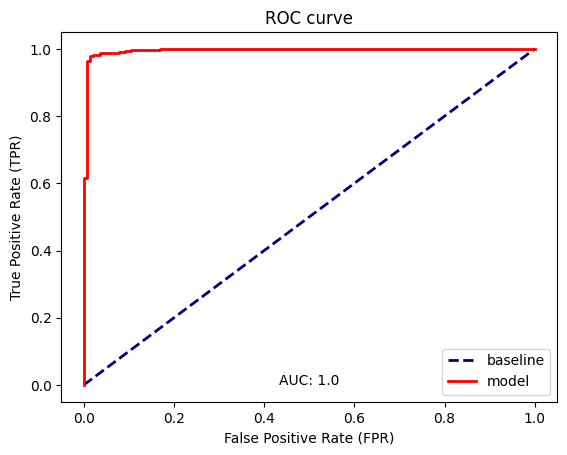

In [71]:
from ml_utils.classification import plot_roc

# Plot the ROC curve using the cleaned predicted probabilities
plot_roc(y_test, y_prob)


Multiclass classification of white wine quality:
a) Using the data/winequality-white.csv file, perform some initial EDA on
the white wine data. Be sure to look at how many wines had a given quality score.
b) Build a pipeline to standardize the data and fit a multiclass logistic regression
model. Pass multi_class='multinomial' and max_iter=1000 to the
LogisticRegression constructor.
c) Look at the classification report for your model.
d) Create a confusion matrix using the confusion_matrix_visual() function
from the ml_utils.classification module. This will work as is for
multiclass classification problems.
e) Extend the plot_roc() function to work for multiple class labels. To do so,
you will need to create a ROC curve for each class label (which are quality scores
here), where a true positive is correctly predicting that quality score and a false
positive is predicting any other quality score. Note that ml_utils has a function
for this, but try to build your own implementation.
f) Extend the plot_pr_curve() function to work for multiple class labels
by following a similar method to part e). However, give each class its own
subplot. Note that ml_utils has a function for this, but try to build your own
implementation.


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the dataset using the correct delimiter (semicolon)
wine_data = pd.read_csv('data/winequality-white.csv', sep=';')

# Check the first few rows to confirm the data is loaded correctly
print(wine_data.head())



   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.00000

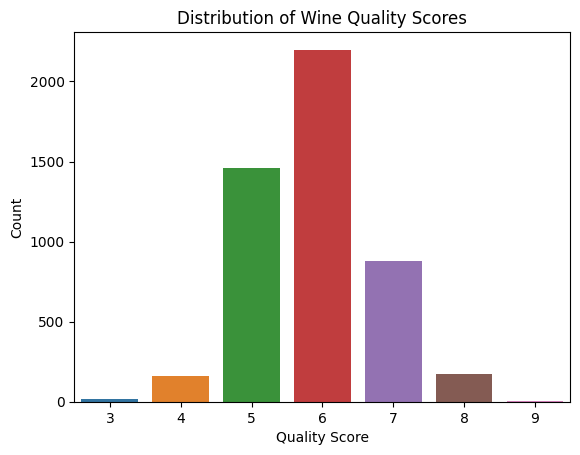

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the basic info about the dataset
print(wine_data.info())

# Get summary statistics
print(wine_data.describe())

# Look at the distribution of quality scores
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()


In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = wine_data.drop(columns=['quality'])  # Features
y = wine_data['quality']  # Target: wine quality

# Split the data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build a pipeline with standardization and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('logreg', LogisticRegression(multi_class='multinomial', max_iter=1000))  # Multiclass logistic regression
])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [79]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.03      0.06        32
           5       0.56      0.52      0.54       358
           6       0.51      0.73      0.60       544
           7       0.53      0.24      0.33       241
           8       0.00      0.00      0.00        43
           9       0.00      0.00      0.00         0

    accuracy                           0.53      1225
   macro avg       0.30      0.22      0.22      1225
weighted avg       0.51      0.53      0.49      1225



c:\Users\marc\anaconda3\envs\book_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marc\anaconda3\envs\book_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Actual', ylabel='Model Prediction'>

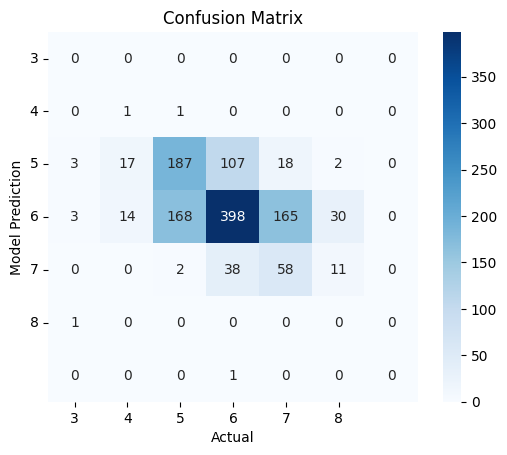

In [82]:
from ml_utils.classification import confusion_matrix_visual

# Define class labels (unique quality scores in the dataset)
class_labels = sorted(y_test.unique())

# Visualize the confusion matrix
confusion_matrix_visual(y_test, y_pred, class_labels)



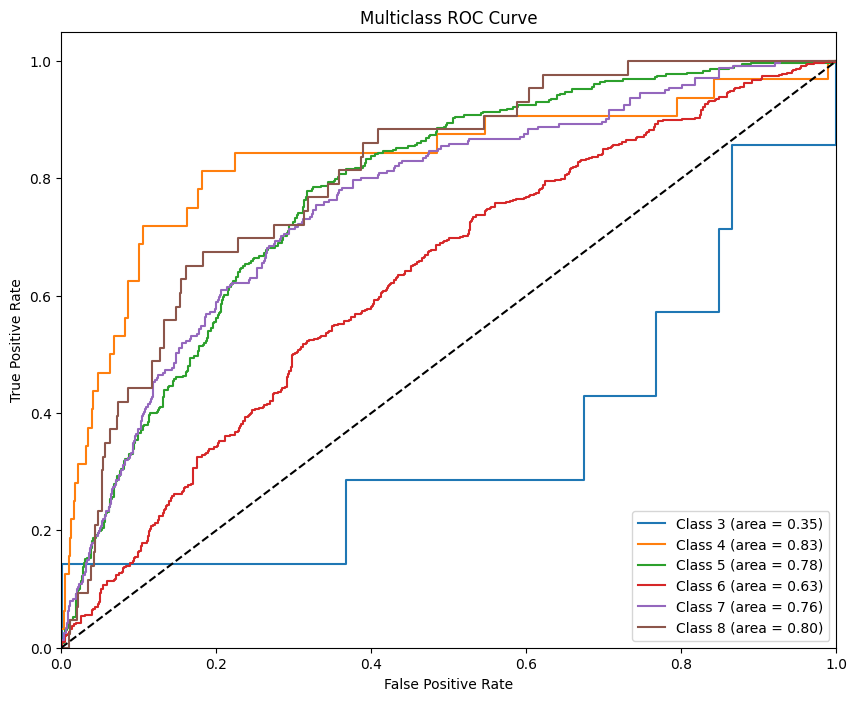

In [83]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the output labels (one-vs-all approach)
y_test_bin = label_binarize(y_test, classes=sorted(y_test.unique()))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    # Get probabilities for each class
    y_prob = pipeline.predict_proba(X_test)[:, i]
    
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {sorted(y_test.unique())[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc='lower right')
plt.show()


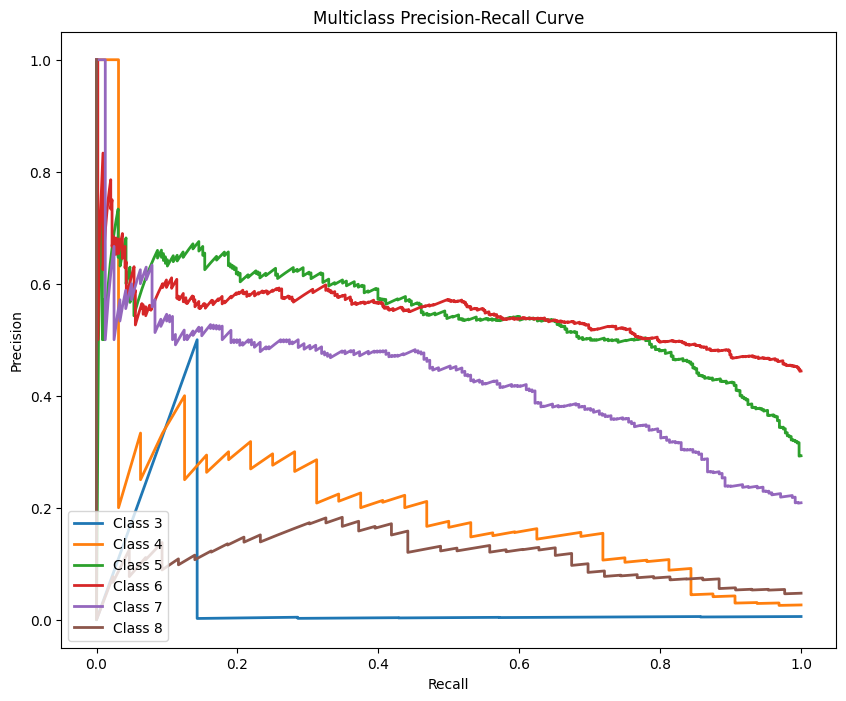

In [84]:
from sklearn.metrics import precision_recall_curve

# Plot precision-recall curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], pipeline.predict_proba(X_test)[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {sorted(y_test.unique())[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
We have seen how easy the scikit-learn API is to navigate, making it a cinch
to change which algorithm we are using for our model. Rebuild the red wine quality
model that we created in this chapter using an SVM instead of logistic regression.
We haven't discussed this model, but you should still be able to use it in scikit-
learn. Check out the link in the Further reading section to learn more about the
algorithm. Some guidance for this exercise is as follows:
a) You will need to use the SVC (support vector classifier) class from scikit-
learn, which can be found at https://scikit-learn.org/stable/
modules/generated/sklearn.svm.SVC.html.
b) Use C=5 as an argument to the SVC constructor.
c) Pass probability=True to the SVC constructor to be able to use the
predict_proba() method.
d) Build a pipeline first using the StandardScaler class and then the SVC class.
e) Be sure to look at the classification report, precision-recall curve, and confusion
matrix for the model

In [87]:
import pandas as pd

# Reload the dataset using the correct delimiter (comma)
wine_data = pd.read_csv('data/winequality-red.csv', sep=',')

# Check the column names to confirm that they are parsed correctly
print(wine_data.columns)




Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = wine_data.drop(columns=['quality'])  # Features
y = wine_data['quality']  # Target: wine quality

# Split the data into training and test sets (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Build a pipeline with standardization and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('svm', SVC(C=5, probability=True))  # SVM with C=5 and probability=True
])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('svm', SVC(C=5, probability=True))])

In [89]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.67      0.76      0.71       164
           6       0.60      0.63      0.61       169
           7       0.51      0.38      0.43        48
           8       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.30      0.29      0.29       400
weighted avg       0.59      0.62      0.60       400



c:\Users\marc\anaconda3\envs\book_env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


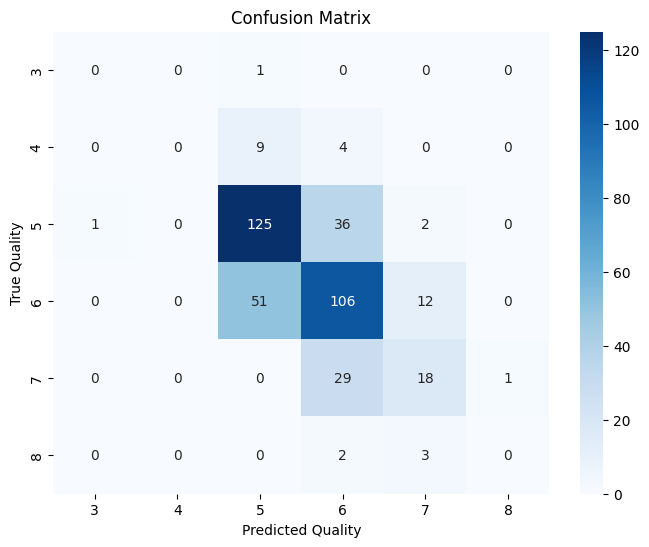

In [90]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()


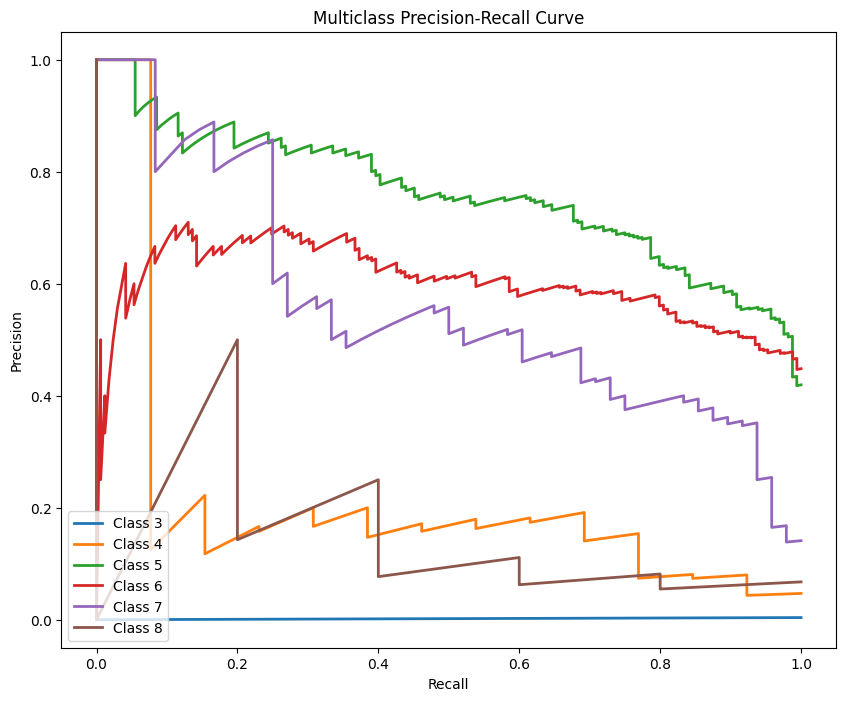

In [91]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Get predicted probabilities for each class
y_prob = pipeline.predict_proba(X_test)

# Binarize the output labels (one-vs-all approach)
y_test_bin = label_binarize(y_test, classes=sorted(y.unique()))
n_classes = y_test_bin.shape[1]

# Plot precision-recall curves for each class
plt.figure(figsize=(10, 8))

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {sorted(y.unique())[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Multiclass Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
